## Курсовой проект


Задача: предсказать стоимость недвижимости

Основные этапы:
1. подготовка данных
    * анализ
    * визуализация
    * обработка выбросов
    * обработка пропусков
    * генерация фичей
2. обучение модели
3. проверка качества модели

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.linear_model import LinearRegression 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
TRAIN_DATASET_PATH = './real-estate-price-prediction-moscow/train.csv'
TEST_DATASET_PATH = './real-estate-price-prediction-moscow/test.csv'

## Подготовка данных 

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)
train_df.head(6)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138


In [6]:
train_df.shape

(10000, 20)

In [7]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [8]:
def cor_type(df):
    df['Id'] = df['Id'].astype(str) 
    df['DistrictId'] = df['DistrictId'].astype(str) 
    return df

In [9]:
cor_type(train_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


### Обработка выбросов и пропусков

In [10]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Целевая переменная

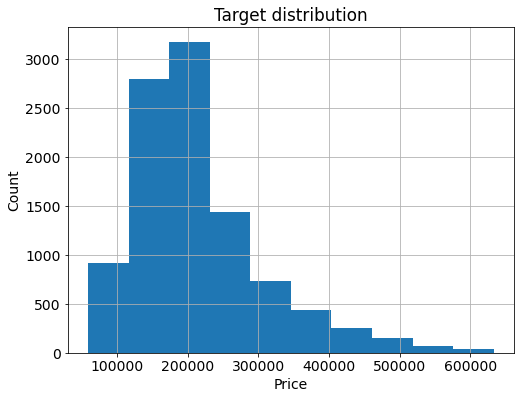

In [11]:
plt.figure(figsize = (8, 6))

train_df['Price'].hist()
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [12]:
train_df['Rooms'].value_counts().sort_index()  ### Комнаты

0.0        8
1.0     3705
2.0     3880
3.0     2235
4.0      150
5.0       18
6.0        1
10.0       2
19.0       1
Name: Rooms, dtype: int64

In [13]:
train_df[(train_df['Rooms'] == 0)].sort_values('Square') ### Комнаты

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9869,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
3780,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
5894,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
7929,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
6401,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007
9767,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887


In [14]:
train_df[(train_df['Rooms'] > 5)].sort_values('Square') ### Комнаты

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6088,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2004,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
8794,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
2728,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [15]:
train_df.groupby(['Rooms'])['Square'].mean() ### Площадь: общая, жилая, кухня

Rooms
0.0      81.620358
1.0      41.323277
2.0      56.788214
3.0      76.903234
4.0      98.377544
5.0     122.614941
6.0      59.414334
10.0     59.964120
19.0     42.006046
Name: Square, dtype: float64

In [16]:
def cor_data(df):
    
    ### Комнаты
    df.loc[(df['Rooms'] == 0) & (df['Square'] < 41.7), 'Rooms'] = 1
    df.loc[(df['Rooms'] == 0) & (df['Square'] >= 41.7) & (df['Square'] < 65.9), 'Rooms'] = 2
    df.loc[(df['Rooms'] == 0) & (df['Square'] >= 65.9), 'Rooms'] = 4
    
    df.loc[(df['Rooms'] > 5) & (df['Square'] < 41.7), 'Rooms'] = 1
    df.loc[(df['Rooms'] > 5) & (df['Square'] >= 41.7) & (df['Square'] < 65.9), 'Rooms'] = 2
    df.loc[(df['Rooms'] > 5) & (df['Square'] >= 65.9), 'Rooms'] = 4
    
    ### Площадь
    df.loc[(df['Square'] < 14) & (df['Rooms'] == 1), 'Square'] = 41.322569
    df.loc[(df['Square'] > 200) & (df['Rooms'] == 5), 'Square'] = 122.614941
    df.loc[((df['Square'] < 14) | (df['Square'] > 200)) & 
             ((df['Rooms'] < 1) | (df['Rooms'] < 5)), 'Square'] = df['Square'].mean()  

    df.loc[(df['LifeSquare'].isnull()) |
             (df['LifeSquare'] > df['Square']) |
             (df['LifeSquare'] < (df['Square'] * 0.5)), 'LifeSquare'] = df['Square'] * 0.75

    df.loc[(df['KitchenSquare'].isnull()) |
             (df['KitchenSquare'] > df['Square']) |
             (df['KitchenSquare'] < (df['Square'] * 0.1)) |
             (df['KitchenSquare'] > df['LifeSquare']), 'KitchenSquare'] = df['Square'] * 0.1

    df.loc[df['Square'] < (df['KitchenSquare'] + df['LifeSquare']),'LifeSquare'] = df['Square'] *0.75
    df.loc[df['Square'] < (df['KitchenSquare'] + df['LifeSquare']),'KitchenSquare'] = df['Square'] *0.1
    
    ### Год постройки
    df.loc[df['HouseYear'] < 1900, 'HouseYear'] = int(df['HouseYear'].median())
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020
    
    ### Этажность
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = int(df['HouseFloor'].median())
    df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor'] = df['Floor'] + 2
    
    ### Healthcare
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
    
    return df

In [17]:
cor_data(train_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,86.270483,11.502731,4,10.0,2014,0.075424,B,B,11,3097,0,900.0,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.000000,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.000000,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,30.307430,4.040991,10,22.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.000000,16,16.0,1972,0.282798,B,B,33,8667,2,900.0,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.000000,3,12.0,1981,0.300323,B,B,52,10311,6,900.0,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.000000,13,13.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.000000,3,5.0,1958,0.460556,B,B,20,4386,14,900.0,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.000000,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


### Генерация признаков 

Возраст жилья в районе

In [18]:
district_age = train_df.groupby(['DistrictId'], as_index=False).agg({'HouseYear':'median'})\
                       .rename(columns={'HouseYear':'DistrictAge'})

district_age.head()

,DistrictId,DistrictAge
0,0,1977.0
1,1,1977.0
2,10,1973.0
3,100,1964.0
4,101,1967.0


In [19]:
train_df = train_df.merge(district_age, on='DistrictId', how='left')
train_df.head(1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictAge
0,11809,27,3.0,115.027311,86.270483,11.502731,4,10.0,2014,0.075424,...,B,11,3097,0,900.0,0,0,B,305018.871089,1977.0


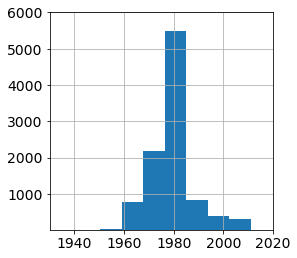

In [20]:
plt.figure(figsize = (4, 4))
plt.axis([1930, 2020, 10, 6000])

train_df['DistrictAge'].hist()


plt.show()

Средняя цена жилья в районе 

In [21]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head(3)

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425


In [22]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head(1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictAge,MedPriceByDistrict
0,11809,27,3.0,115.027311,86.270483,11.502731,4,10.0,2014,0.075424,...,11,3097,0,900.0,0,0,B,305018.871089,1977.0,213530.788443


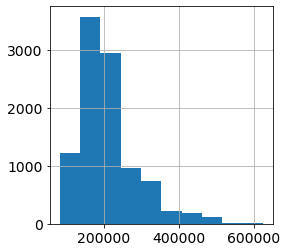

In [23]:
plt.figure(figsize = (4, 4))

train_df['MedPriceByDistrict'].hist()


plt.show()

In [24]:
train_df.groupby(['DistrictAge'])['MedPriceByDistrict'].mean().sort_values()

DistrictAge
1953.0    129080.871245
1962.5    171834.321955
1977.0    176084.251582
2004.0    180955.359114
1990.0    188504.686214
              ...      
1957.0    429969.899992
1955.5    431137.654083
1928.0    432635.865343
1955.0    450654.779595
1928.5    482791.138606
Name: MedPriceByDistrict, Length: 72, dtype: float64

Dummies

In [25]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

Перенос на тестовую выборку

In [26]:
test_df.head(6)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
5,868,38,3.0,87.139994,53.180419,10.0,4,23.0,2011,0.060753,B,B,15,2787,2,520.0,0,7,B


In [27]:
cor_type(test_df)
cor_data(test_df)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.000000,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,31.870430,10.000000,7,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A
2,960,27,2.0,59.463678,44.597759,9.000000,19,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.000000,2,2.0,1965,0.014073,B,B,2,475,0,900.0,0,0,B
4,746,74,1.0,53.837056,40.377792,5.383706,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.000000,6,8.0,1962,0.069660,B,B,31,6119,4,900.0,1,2,B
4996,16138,38,3.0,93.698122,70.273592,10.000000,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.000000,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.000000,8,14.0,1970,0.089040,B,B,33,7976,5,900.0,0,11,B


In [28]:
test_df = test_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
test_df.head(1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,MedPriceByDistrict
0,4567,44,1.0,36.84763,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B,171145.169069


In [29]:
test_df = test_df.merge(district_age, on=['DistrictId'], how='left')

In [30]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

In [31]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,MedPriceByDistrict,DistrictAge,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,4935.000000,4992.000000,5000.000000,5000.000000,5000.000000
mean,1.907800,56.458093,38.127863,7.333618,8.632000,13.818000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,211251.072025,1978.304788,0.990400,0.970200,0.917600
std,0.808103,18.673244,13.992178,2.526537,5.483228,6.093103,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,72892.397416,9.259851,0.097518,0.170052,0.275001
min,1.000000,16.319015,9.698766,1.631901,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,84250.557673,1924.500000,0.000000,0.000000,0.000000
25%,1.000000,41.912403,28.896537,5.482033,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,165478.896000,1975.000000,1.000000,1.000000,1.000000
50%,2.000000,52.924953,34.459399,7.000000,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,197049.231078,1977.000000,1.000000,1.000000,1.000000
75%,2.000000,66.269760,47.005450,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,239840.323247,1980.000000,1.000000,1.000000,1.000000
max,5.000000,189.679576,130.480860,42.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,593618.746096,2011.000000,1.000000,1.000000,1.000000


Отбор признаков

In [32]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin', 'DistrictAge', 'MedPriceByDistrict']

target_name = ['Price']

In [33]:
train_df.shape

(10000, 25)

In [34]:
test_df.shape

(5000, 24)

### Разбиение на train и test

In [35]:
X = train_df[feature_names]
y = train_df[target_name]

In [36]:
X_train, X_test_valid, y_train, y_test_valid = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=6
)

### Стандартизация признаков

In [37]:
scaler = StandardScaler()

In [38]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = [feature_names])

In [39]:
X_test_scaled = scaler.fit_transform(X_test_valid)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = [feature_names])

### Построение модели, оценка качества

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [42]:
y_pred_valid = lr.predict(X_test_scaled)

In [43]:
r2(y_test_valid, y_pred_valid)

0.7012239445091765

**Важность признаков**

In [44]:
lr.coef_

array([[-1.94144194e+04,  4.98080870e+04, -1.78715077e+04,
         2.74484911e+03,  5.13304696e+03,  6.75967587e+03,
        -2.35239217e+02, -1.14769690e+03,  6.95276850e+02,
        -1.63902040e+03,  1.22814913e+04, -7.72386935e+02,
         1.93966322e+03,  3.90208809e+03,  4.62354994e+01,
        -4.39078808e+03,  7.04237399e+02, -8.67848119e+03,
         6.41200005e+04]])

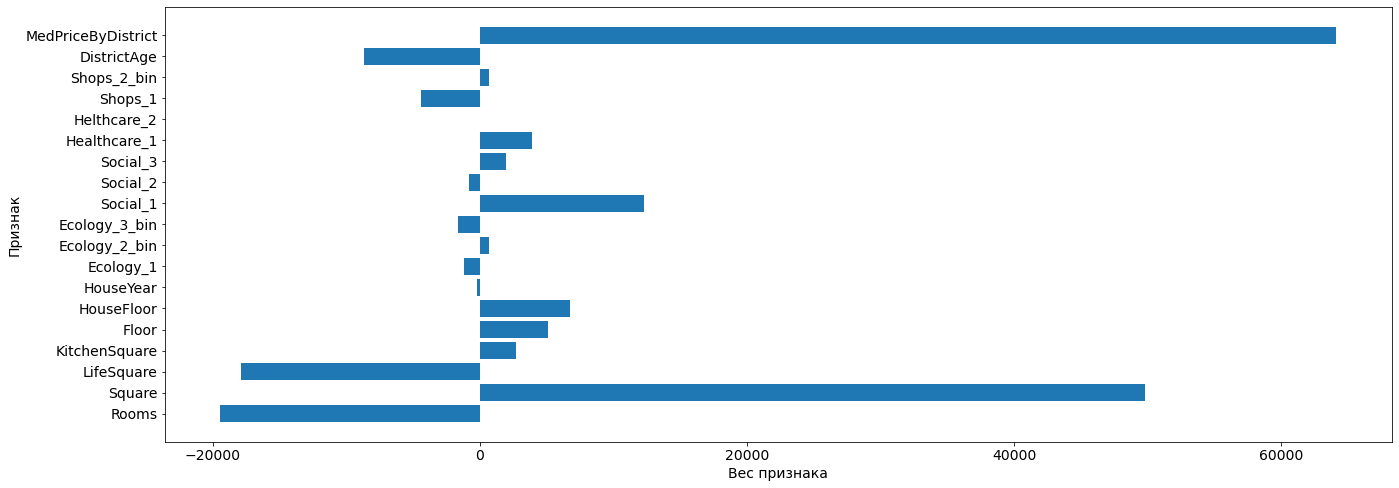

In [45]:
plt.figure(figsize = (22, 8))

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [46]:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > 100
]

print(important_features)

['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Shops_1', 'Shops_2_bin', 'DistrictAge', 'MedPriceByDistrict']


In [57]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)

y_pred_valid = lr.predict(X_test_scaled.loc[:, important_features])

In [58]:
r2(y_test_valid, y_pred_valid)

0.7012248173704216

In [59]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,MedPriceByDistrict,DistrictAge,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.907800,56.458093,38.127863,7.333618,8.632000,13.818000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,211066.448092,1978.302700,0.990400,0.970200,0.917600
std,0.808103,18.673244,13.992178,2.526537,5.483228,6.093103,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,72434.821006,9.252586,0.097518,0.170052,0.275001
min,1.000000,16.319015,9.698766,1.631901,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,84250.557673,1924.500000,0.000000,0.000000,0.000000
25%,1.000000,41.912403,28.896537,5.482033,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,165478.896000,1975.000000,1.000000,1.000000,1.000000
50%,2.000000,52.924953,34.459399,7.000000,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,197049.231078,1977.000000,1.000000,1.000000,1.000000
75%,2.000000,66.269760,47.005450,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,239606.501593,1980.000000,1.000000,1.000000,1.000000
max,5.000000,189.679576,130.480860,42.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,593618.746096,2011.000000,1.000000,1.000000,1.000000


In [60]:
test_df.loc[test_df['DistrictAge'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,MedPriceByDistrict,DistrictAge,Ecology_2_bin,Ecology_3_bin,Shops_2_bin


In [61]:
test_df.loc[test_df['DistrictAge'].isnull(), 'DistrictAge'] = test_df['DistrictAge'].median()
test_df.loc[test_df['MedPriceByDistrict'].isnull(), 'MedPriceByDistrict'] = test_df['MedPriceByDistrict'].median()

In [62]:
X_test_real = test_df[feature_names]

In [63]:
X_test_real.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_bin,Ecology_3_bin,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_bin,DistrictAge,MedPriceByDistrict
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.907800,56.458093,38.127863,7.333618,8.632000,13.818000,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,0.917600,1978.302700,211066.448092
std,0.808103,18.673244,13.992178,2.526537,5.483228,6.093103,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,0.275001,9.252586,72434.821006
min,1.000000,16.319015,9.698766,1.631901,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1924.500000,84250.557673
25%,1.000000,41.912403,28.896537,5.482033,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,1.000000,1975.000000,165478.896000
50%,2.000000,52.924953,34.459399,7.000000,7.000000,14.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000,1977.000000,197049.231078
75%,2.000000,66.269760,47.005450,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000,1980.000000,239606.501593
max,5.000000,189.679576,130.480860,42.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,2011.000000,593618.746096


In [64]:
X_test_real_scaled = scaler.fit_transform(X_test_real)
X_test_real_scaled = pd.DataFrame(X_test_real_scaled, columns = [feature_names])

In [67]:
X_test_real_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Rooms,)               5000 non-null   float64
 1   (Square,)              5000 non-null   float64
 2   (LifeSquare,)          5000 non-null   float64
 3   (KitchenSquare,)       5000 non-null   float64
 4   (Floor,)               5000 non-null   float64
 5   (HouseFloor,)          5000 non-null   float64
 6   (HouseYear,)           5000 non-null   float64
 7   (Ecology_1,)           5000 non-null   float64
 8   (Ecology_2_bin,)       5000 non-null   float64
 9   (Ecology_3_bin,)       5000 non-null   float64
 10  (Social_1,)            5000 non-null   float64
 11  (Social_2,)            5000 non-null   float64
 12  (Social_3,)            5000 non-null   float64
 13  (Healthcare_1,)        5000 non-null   float64
 14  (Helthcare_2,)         5000 non-null   float64
 15  (Sho

In [68]:
test_df['Price'] = lr.predict(X_test_real_scaled.loc[:, important_features])

In [69]:
test_id = test_df["Id"]
pred_df = pd.DataFrame()
pred_df["Id"] = test_id
pred_df["Price"] = test_df['Price']
assert pred_df.shape[0] == 5000, f"Real pred-shape = {pred_df.shape[0]}, Expected pred-shape = 5000"

pred_df.to_csv("./predictions1_.csv", index=False)

In [70]:
pred_df = pd.read_csv("./predictions1_.csv")
pred_df.head(n=2)

,Id,Price
0,4567,165107.624281
1,5925,124893.813076
